In [103]:
# !pip install lightgbm
# !pip install shap

In [2]:
# Imports
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
#import lightgbm as lgb
#from lightgbm import LGBMClassifier


In [105]:
files_to_open = ['logistic_random_results', 'logistic_hyperopt_results', 'Random_Forest_random_results', 
                 'rf_hyperopt_results', 'lgb_random_results','lgb_hyperopt_results']

In [106]:
def df_open(f):
  
  data_frame = pd.read_csv(f)
  if 'hyperopt' in f and 'auc' not in data_frame.columns.values:
      data_frame['auc'] = 1- data_frame['loss']
      data_frame = data_frame.sort_values('auc', ascending = False)
  elif 'random' in f:
      data_frame = data_frame.sort_values('mean_test_score', ascending = False)
      
  return data_frame
  

In [107]:
#Dictionary of model results and best models(clf)

def foo(files_to_load = []):
  results_dict = {}
  best_models_dict = {}
  for f in files_to_load:
    m = f.replace('results', 'clf')
    results_dict[f] = df_open(f)
    best_params = ast.literal_eval(results_dict[f]['params'][0])
    if 'logistic' in f:
      #Fitting with params which give highest score
      best_models_dict[m] = SGDClassifier(**best_params)
    elif 'Random_Forest' in f or 'rf_' in f:
      best_models_dict[m] = RandomForestClassifier(random_state=0, **best_params)
    elif 'lgb' in f:
      best_models_dict[m] = lgb.LGBMClassifier(**best_params)
      
  return results_dict, best_models_dict

In [145]:
results_dict['logistic_random_results']

,Unnamed: 0,mean_fit_time,mean_score_time,mean_test_score,param_alpha,param_class_weight,param_l1_ratio,param_learning_rate,param_loss,param_penalty,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_fit_time,std_score_time,std_test_score
0,18,4.726601,0.029998,0.702937,0.0007,NaN,0.5,optimal,log,elasticnet,"{'penalty': 'elasticnet', 'class_weight': None...",1,0.692243,0.726084,0.717452,0.717208,0.661696,0.040312,0.001781,0.023517
1,1,8.754324,0.066130,0.701426,0.0007,balanced,0.4,optimal,log,elasticnet,"{'penalty': 'elasticnet', 'class_weight': 'bal...",2,0.695109,0.698660,0.718544,0.717333,0.677482,3.319285,0.028165,0.015277
2,31,4.680238,0.029786,0.696131,0.0006,balanced,0.6,optimal,log,elasticnet,"{'penalty': 'elasticnet', 'class_weight': 'bal...",3,0.706158,0.723316,0.684856,0.702385,0.663939,0.031910,0.001722,0.020209
3,11,4.804276,0.029420,0.690470,0.0007,NaN,0.3,optimal,log,elasticnet,"{'penalty': 'elasticnet', 'class_weight': None...",4,0.708900,0.710999,0.675017,0.704695,0.652735,0.136653,0.001841,0.022918
4,0,11.259274,0.060398,0.690443,0.0005,NaN,0.6,optimal,log,elasticnet,"{'penalty': 'elasticnet', 'class_weight': None...",5,0.683800,0.702622,0.686146,0.713241,0.666405,0.628327,0.015219,0.016177
5,39,4.256281,0.026106,0.686366,0.0005,balanced,0.5,optimal,log,elasticnet,"{'penalty': 'elasticnet', 'class_weight': 'bal...",6,0.698894,0.696020,0.694501,0.675181,0.667233,0.222484,0.001686,0.012708
6,32,4.748325,0.030727,0.685072,0.0006,balanced,0.2,optimal,log,elasticnet,"{'penalty': 'elasticnet', 'class_weight': 'bal...",7,0.672896,0.705489,0.693343,0.697614,0.656015,0.051136,0.001839,0.018084
7,20,4.717260,0.032278,0.683300,0.0006,balanced,0.5,optimal,log,elasticnet,"{'penalty': 'elasticnet', 'class_weight': 'bal...",8,0.676381,0.677078,0.686109,0.706943,0.669990,0.044346,0.003187,0.012889
8,15,4.774486,0.030410,0.680581,0.0005,balanced,0.3,optimal,log,elasticnet,"{'penalty': 'elasticnet', 'class_weight': 'bal...",9,0.675402,0.716651,0.688298,0.660646,0.661908,0.078798,0.002115,0.020657
9,10,4.826600,0.030396,0.673877,0.0004,balanced,0.6,optimal,log,elasticnet,"{'penalty': 'elasticnet', 'class_weight': 'bal...",10,0.671617,0.658198,0.683659,0.692838,0.663069,0.251536,0.002193,0.012829


In [108]:
results_dict, best_models_dict = foo(files_to_load=files_to_open)

## Hyper parameter graphs

In [109]:
resampled_df = pd.read_csv('resampled_df_40.csv')

In [110]:
resampled_df = resampled_df.drop(resampled_df.columns[0], axis = 1)
response='TARGET'
predictors= [col for col in resampled_df.columns if col != response]
X_resampled = resampled_df[predictors]
y_resampled = resampled_df[response]

In [111]:
best_models_dict.keys()

dict_keys(['logistic_hyperopt_clf', 'rf_hyperopt_clf', 'lgb_random_clf', 'Random_Forest_random_clf', 'lgb_hyperopt_clf', 'logistic_random_clf'])

Text(0,0.5,'Density')

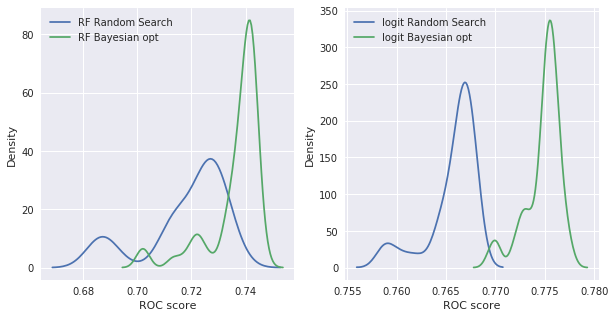

In [144]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (10,5))

sns.kdeplot(results_dict['Random_Forest_random_results']['mean_test_score'], label = 'RF Random Search', ax = ax1)
sns.kdeplot(results_dict['rf_hyperopt_results']['auc'], label = 'RF Bayesian opt', ax = ax1)
ax1.set_ylabel('Density')
ax1.set_xlabel('ROC score')

sns.kdeplot(results_dict['lgb_random_results']['mean_test_score'], label = 'logit Random Search', ax = ax2)
sns.kdeplot(results_dict['lgb_hyperopt_results']['auc'], label = 'logit Bayesian opt', ax = ax2)

plt.xlabel('ROC score')
plt.ylabel('Density')

In [112]:
#Plotting certain hyperparameters against ROC-AUC score

from mpl_toolkits.mplot3d import Axes3D

def plot_3d(x, y, z, df1, df2, title1 = '', title2 = '', cmap = plt.cm.seismic_r):
    """2 x 3D scatterplot of data"""

    fig = plt.figure(figsize = (10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    
    if 'mean_test_score' in df1.columns.values:
      x1, y1 = map(lambda x: "param_{0}".format(x), [x, y])
      z1 = 'mean_test_score'
      ax1.scatter(df1[x1].astype(float), df1[y1].astype(float),
               df1[z1].astype(float), c = df1[z1].astype(float), 
               cmap = cmap, s = 30)
    
      ax1.set_xlabel(x)
      ax1.set_ylabel(y)
      ax1.set_zlabel(z)
      
      plt.tight_layout()
      plt.title(title1, size = 18);
      
    if 'auc' in df2.columns.values:
      
      ax2 = fig.add_subplot(1,2,2, projection = '3d')
      ax2.scatter(df2[x].astype(float), df2[y].astype(float),
                 df2[z].astype(float), c = df2[z].astype(float), 
                 cmap = cmap, s = 30)

      ax2.set_xlabel(x)
      ax2.set_ylabel(y)
      ax2.set_zlabel(z)

      plt.tight_layout()
      plt.title(title2, size = 18);



In [113]:
#Function to transform hyperopt results for plotting
def transform_hyperopt(dataframe):
  if 'loss' in dataframe.columns.values:
      temp = pd.DataFrame([ast.literal_eval(dict) for dict in dataframe['params'].tolist()])
      temp2 = pd.concat([temp, dataframe['auc'].reset_index(drop = True)], axis = 1)
  return temp2

In [114]:
transformed_lgb = transform_hyperopt(results_dict['lgb_hyperopt_results'])
transformed_lgb.columns

Index(['bagging_fraction', 'bagging_freq', 'colsample_bytree',
       'feature_fraction', 'is_unbalance', 'lambda_l1', 'lambda_l2',
       'learning_rate', 'max_bin', 'max_depth', 'min_child_samples',
       'min_data_in_leaf', 'n_estimators', 'num_iterations', 'num_leaves',
       'reg_alpha', 'reg_lambda', 'subsample', 'subsample_freq', 'auc'],
      dtype='object')

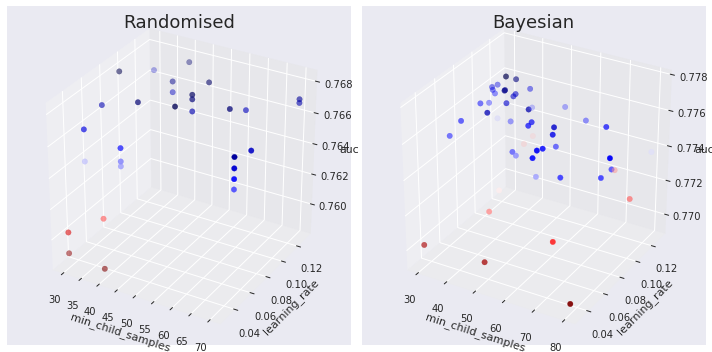

In [125]:
#Number of leaves against learning rate
plot_3d('min_child_samples', 'learning_rate', 'auc', df1 = results_dict['lgb_random_results'], df2= transformed_lgb, title1= 'Randomised', title2 = 'Bayesian')

As can be seen from the graphs, a higher learning rate coupled with lower number of data in each leaf results in better scores. This is quite intuitive as lower min_child_samples usually result in lower bias (better fits) whilst higher learning rates increase the contribution each tree makes to the final predictions

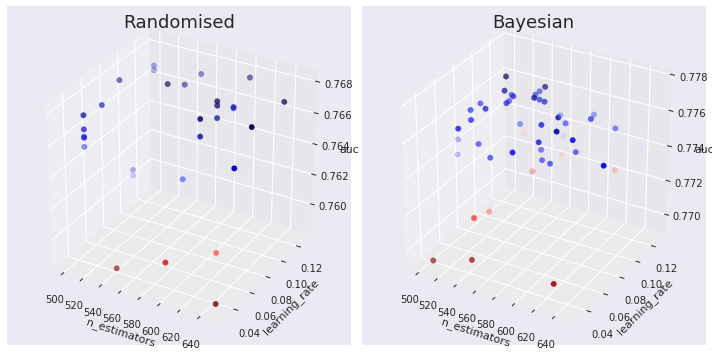

In [122]:
#Number of estimators 
plot_3d('n_estimators', 'learning_rate', 'auc', df1 = results_dict['lgb_random_results'], df2= transformed_lgb, title1= 'Randomised', title2 = 'Bayesian')

Lower number of learners with a higher learning rate seems to result in higher auc scores. This can be seen quite clearly from Bayesian graph where datapoints are clumped towards the far corner

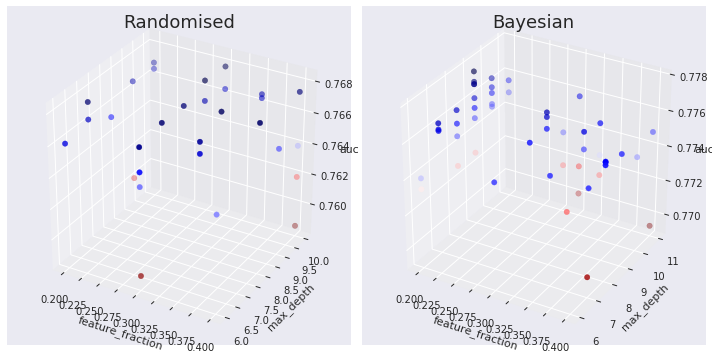

In [118]:
plot_3d('feature_fraction', 'max_depth', 'auc', df1 = results_dict['lgb_random_results'], df2= transformed_lgb, title1= 'Randomised', title2 = 'Bayesian')

Interestingly, it is a lower feature fraction and higher max_depth that result in higher roc scores. Naturally, a higher depth is expected to fit the data better. However, as feature fraction controls the amount of features used to train each individual tree, one would expect more features to result in higher scores. 

In [7]:
NN_random_results = pd.read_csv('NN_random_results2').sort_values('mean_test_score', ascending = False)

In [8]:
NN_random_results.columns

Index(['Unnamed: 0', 'mean_fit_time', 'mean_score_time', 'mean_test_score',
       'param_activation', 'param_batch_size', 'param_dropout', 'param_epochs',
       'param_first_neuron', 'param_hidden_layers', 'param_kernel_initializer',
       'param_lr', 'param_optimizer', 'param_second_neuron',
       'param_third_neuron', 'params', 'rank_test_score', 'split0_test_score',
       'split1_test_score', 'std_fit_time', 'std_score_time',
       'std_test_score'],
      dtype='object')

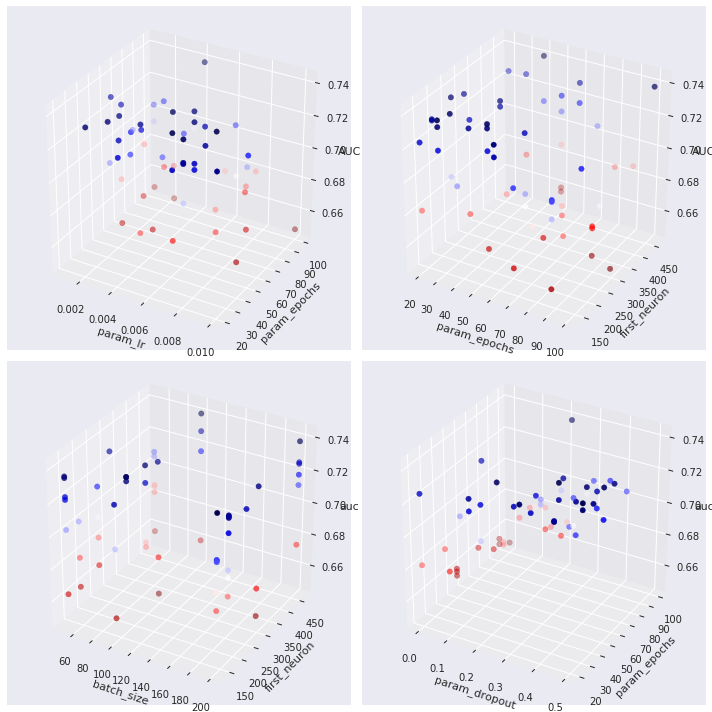

In [19]:
from mpl_toolkits.mplot3d import Axes3D

df1 = NN_random_results
cmap = plt.cm.seismic_r

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(221, projection='3d')
    
ax1.scatter(df1['param_lr'].astype(float), df1['param_epochs'].astype(float),
               df1['mean_test_score'].astype(float), c = df1['mean_test_score'].astype(float), 
               cmap = cmap, s = 30)
ax1.set_xlabel('param_lr')
ax1.set_ylabel('param_epochs')
ax1.set_zlabel('AUC')
      
plt.tight_layout()

ax2 = fig.add_subplot(222, projection='3d')
    
ax2.scatter(df1['param_epochs'].astype(float), df1['param_first_neuron'].astype(float),
               df1['mean_test_score'].astype(float), c = df1['mean_test_score'].astype(float), 
               cmap = cmap, s = 30)
ax2.set_xlabel('param_epochs')
ax2.set_ylabel('first_neuron')
ax2.set_zlabel('AUC')
      
plt.tight_layout()


ax3 = fig.add_subplot(223, projection='3d')
    
ax3.scatter(df1['param_batch_size'].astype(float), df1['param_first_neuron'].astype(float),
               df1['mean_test_score'].astype(float), c = df1['mean_test_score'].astype(float), 
               cmap = cmap, s = 30)
ax3.set_xlabel('batch_size')
ax3.set_ylabel('first_neuron')
ax3.set_zlabel('auc')
      
plt.tight_layout()


ax4 = fig.add_subplot(224, projection='3d')
    
ax4.scatter(df1['param_dropout'].astype(float), df1['param_epochs'].astype(float),
               df1['mean_test_score'].astype(float), c = df1['mean_test_score'].astype(float), 
               cmap = cmap, s = 30)
ax4.set_xlabel('param_dropout')
ax4.set_ylabel('param_epochs')
ax4.set_zlabel('auc')
      
plt.tight_layout()
      
      

